In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

In [2]:
datadir = "../data/sem"

In [3]:
cutline = 890

(960, 1280, 3)


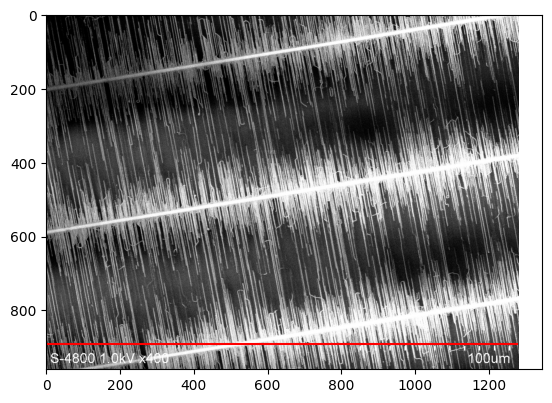

In [4]:
image = cv2.imread(os.path.join(datadir, "kaneda_m001.tif"))
print(image.shape)
plt.imshow(image)
plt.hlines(cutline, 0, image.shape[1], colors='r')
plt.show()

In [5]:
imd = image[0:cutline,:,:]

(890, 1280, 3)


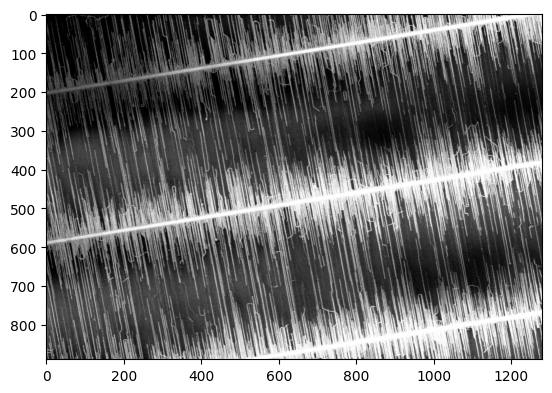

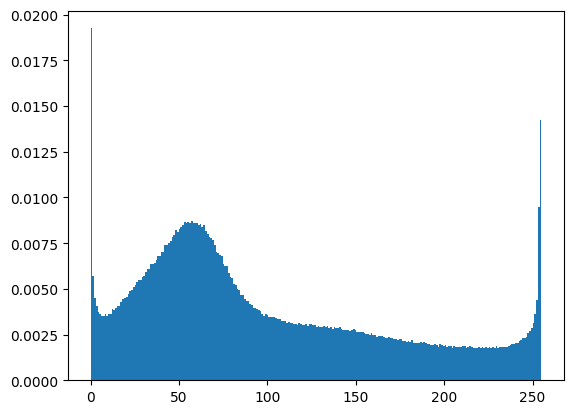

In [6]:
print(imd.shape)
imdflatt = imd.copy().flatten()
plt.imshow(imd)
plt.show()
plt.hist(imdflatt, bins=256, density=True)
plt.show()

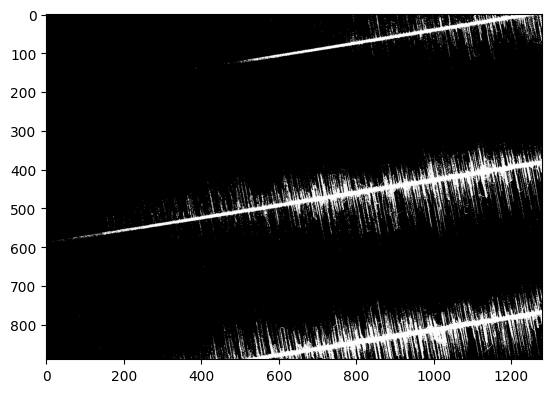

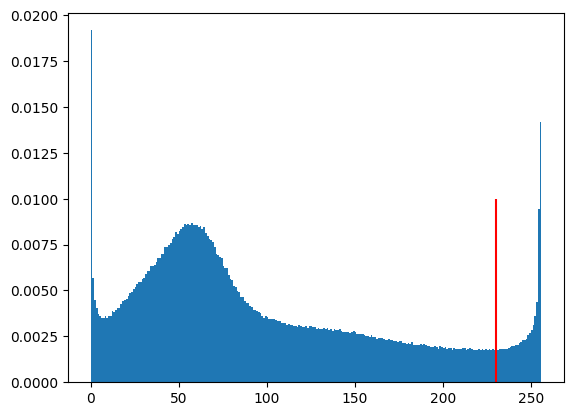

In [7]:
thereshold = 230
imdlight = np.where(imd < thereshold, 0, imd)
plt.imshow(imdlight)
plt.show()
plt.hist(imdflatt, bins=256, range=(0, 256), density=True)
plt.vlines(thereshold, 0, 0.01, color='r')

In [8]:
imd_cropped = image[0:100,1100:1200,:]

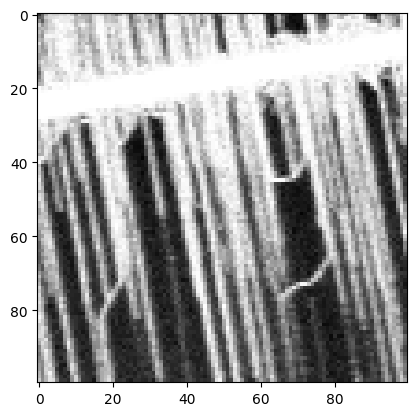

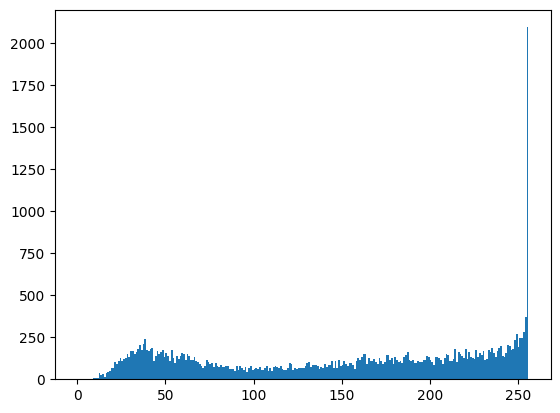

In [9]:
plt.imshow(imd_cropped)
plt.show()
plt.hist(imd_cropped.flatten(), bins=256, range=(0, 256))
plt.show()

# パワースペクトルの表示

(890, 1280, 3)


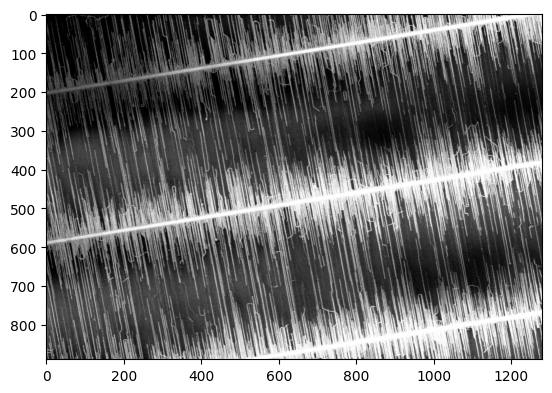

In [10]:
print(imd.shape)
plt.imshow(imd)
plt.show()

### グレースケールへの変換の前処理

In [11]:
imd = cv2.cvtColor(imd, cv2.COLOR_BGR2GRAY)
print(imd.shape)

(890, 1280)


### 回転の前処理

In [12]:
angle = -9.3

In [13]:
height, width = imd.shape
center = (int(width/2), int(height/2))
print(height, width, center)

890 1280 (640, 445)


In [14]:
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1)
rotated_image = cv2.warpAffine(imd, rotation_matrix, (width, height))

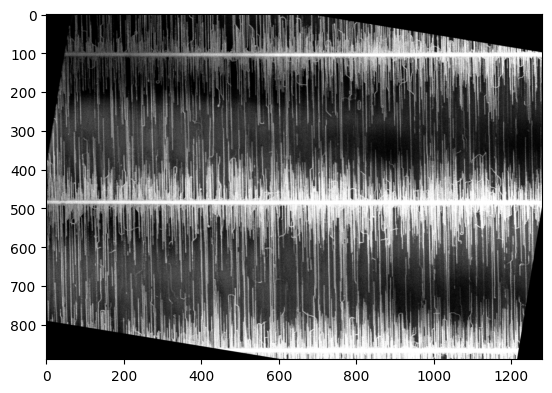

In [15]:
plt.imshow(rotated_image, cmap='gray')
plt.show()

In [16]:
crop_rotated = rotated_image[70:750, 100:1100]

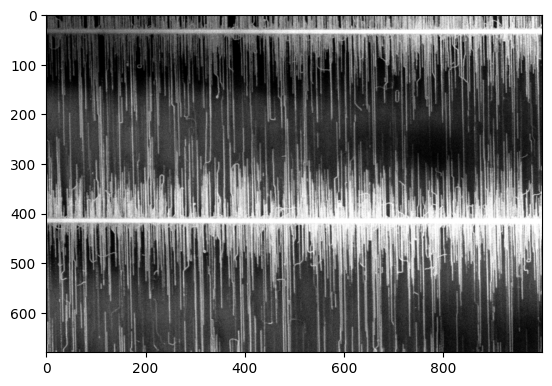

In [17]:
plt.imshow(crop_rotated, cmap='gray')
plt.show()

### パワースペクトルの表示

[[135.7117529  162.27200221 162.73049337 ... 168.07896029 162.73049337
  162.27200221]
 [137.79982156 152.30331378 167.91676513 ... 147.27915136 156.35282778
  174.37402896]
 [147.70032183 142.33478934 137.75805843 ... 136.0601255  152.55633321
  162.82019866]
 ...
 [142.16644197 107.02298335 150.65935646 ... 168.46597392 162.04895993
  163.61368613]
 [147.70032183 162.82019866 152.55633321 ... 163.07430594 137.75805843
  142.33478934]
 [137.79982156 174.37402896 156.35282778 ... 144.35884204 167.91676513
  152.30331378]]


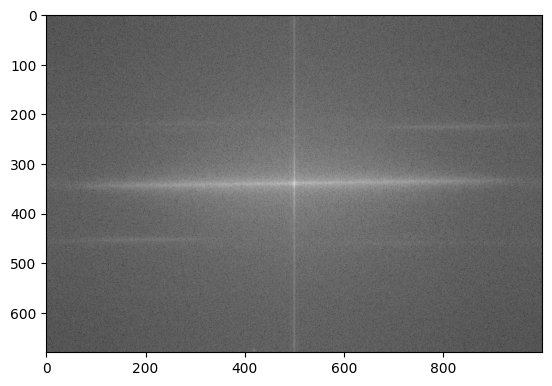

In [18]:
fimage = np.fft.fft2(crop_rotated)
fshift = np.fft.fftshift(fimage)
magnitude_spectrum = 20*np.log(np.abs(fshift))

print(magnitude_spectrum)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.show()

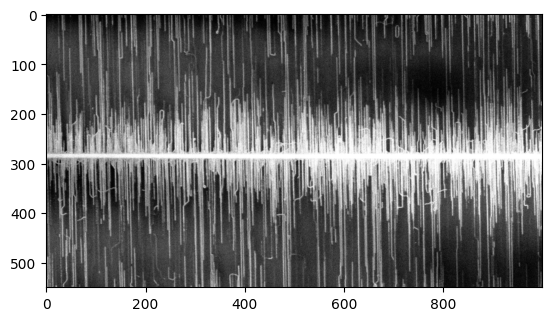

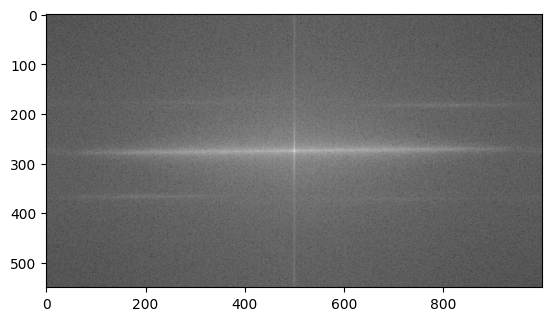

In [19]:
crop_rotated2 = rotated_image[200:750, 100:1100]
plt.imshow(crop_rotated2, cmap='gray')
plt.show()
fimage2 = np.fft.fft2(crop_rotated2)
fshift2 = np.fft.fftshift(fimage2)
magnitude_spectrum2 = 20*np.log(np.abs(fshift2))
plt.imshow(magnitude_spectrum2, cmap='gray')
plt.show()